<a href="https://colab.research.google.com/github/MirasKassymuly/scrpproject/blob/main/scrpproject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#part 1 Almat, Yessenzhan

In [ ]:
import time
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from concurrent.futures import ThreadPoolExecutor, as_completed

In [ ]:
import time
import requests
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed

API_KEY = "b87daa5dd0c344dcb9f1150ba755f142"
BASE_URL = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest"
HEADERS = {"X-CMC_PRO_API_KEY": API_KEY, "Accepts": "application/json"}
OUT_CSV = "coinmarketcap_full.csv"


TARGET_N = 12000
PAGE_LIMIT = 500
MAX_WORKERS = 5
SLEEP_BETWEEN_REQUESTS = 0.2

def fetch_chunk(start=1, limit=100):
    """Запрос к API для одной страницы"""
    params = {"start": start, "limit": limit, "convert": "USD"}
    r = requests.get(BASE_URL, headers=HEADERS, params=params, timeout=30)
    r.raise_for_status()
    return r.json().get("data", [])

def fetch_range(start):
    """Обработка одной страницы: возвращает список словарей"""
    try:
        data = fetch_chunk(start=start, limit=PAGE_LIMIT)
        rows = []
        for item in data:
            rows.append({
                "id": item.get("id"),
                "name": item.get("name"),
                "symbol": item.get("symbol"),
                "slug": item.get("slug"),
                "cmc_rank": item.get("cmc_rank"),
                "date_added": item.get("date_added"),
                "max_supply": item.get("max_supply"),
                "circulating_supply": item.get("circulating_supply"),
                "total_supply": item.get("total_supply"),
                "tags": "|".join(item.get("tags", [])),
                "num_market_pairs": item.get("num_market_pairs"),
                "price_usd": item.get("quote", {}).get("USD", {}).get("price"),
                "volume_24h": item.get("quote", {}).get("USD", {}).get("volume_24h"),
                "market_cap": item.get("quote", {}).get("USD", {}).get("market_cap"),
                "percent_change_1h": item.get("quote", {}).get("USD", {}).get("percent_change_1h"),
                "percent_change_24h": item.get("quote", {}).get("USD", {}).get("percent_change_24h"),
                "percent_change_7d": item.get("quote", {}).get("USD", {}).get("percent_change_7d")
            })
        time.sleep(SLEEP_BETWEEN_REQUESTS)
        print(f"Fetched start={start} rows={len(rows)}")
        return rows
    except Exception as e:
        print(f"Error fetching start={start}: {e}")
        return []

def main():
    starts = list(range(1, TARGET_N + 1, PAGE_LIMIT))
    all_rows = []

    with ThreadPoolExecutor(max_workers=MAX_WORKERS) as executor:
        future_to_start = {executor.submit(fetch_range, s): s for s in starts}
        for future in as_completed(future_to_start):
            rows = future.result()
            all_rows.extend(rows)

    print(f"Total rows collected: {len(all_rows)}")
    df = pd.DataFrame(all_rows)
    df.to_csv(OUT_CSV, index=False)
    print(f"Saved {OUT_CSV}")

if __name__ == "__main__":
    main()

Fetched start=1501 rows=500
Fetched start=1001 rows=500
Fetched start=2001 rows=500
Fetched start=2501 rows=500
Fetched start=3001 rows=500
Fetched start=3501 rows=500
Fetched start=501 rows=500
Fetched start=4001 rows=500
Fetched start=4501 rows=500
Fetched start=5001 rows=500
Fetched start=5501 rows=500
Fetched start=6001 rows=500
Fetched start=6501 rows=500
Fetched start=7501 rows=500
Fetched start=7001 rows=500
Fetched start=8001 rows=500
Fetched start=8501 rows=500
Fetched start=9001 rows=12
Fetched start=9501 rows=0
Fetched start=10001 rows=0
Fetched start=11001 rows=0
Fetched start=10501 rows=0
Fetched start=11501 rows=0
Fetched start=1 rows=500
Total rows collected: 9012
Saved coinmarketcap_full.csv


#part 2 Daryn , Ismail

In [ ]:
# 1. Column name standardization
df.columns = df.columns.str.lower().str.strip()

In [ ]:
# 2. Data inspection
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  8999 non-null   int64  
 1   name                8999 non-null   object 
 2   symbol              8999 non-null   object 
 3   slug                8999 non-null   object 
 4   cmc_rank            8999 non-null   int64  
 5   date_added          8999 non-null   object 
 6   max_supply          6379 non-null   float64
 7   circulating_supply  8999 non-null   float64
 8   total_supply        8999 non-null   float64
 9   tags                8818 non-null   object 
 10  num_market_pairs    8999 non-null   int64  
 11  price_usd           8999 non-null   float64
 12  volume_24h          8999 non-null   float64
 13  market_cap          8999 non-null   float64
 14  percent_change_1h   8999 non-null   float64
 15  percent_change_24h  8999 non-null   float64
 16  percen

,id,cmc_rank,max_supply,circulating_supply,total_supply,num_market_pairs,price_usd,volume_24h,market_cap,percent_change_1h,percent_change_24h,percent_change_7d,liquidity_ratio,price_log
count,8999.000000,8999.000000,6.379000e+03,8.999000e+03,8.999000e+03,8999.000000,8.999000e+03,8.999000e+03,8.999000e+03,8999.000000,8.999000e+03,8.999000e+03,3778.000000,8999.000000
mean,25101.107901,4507.875986,2.185857e+21,4.856486e+20,7.614688e+22,67.494611,1.655370e+07,2.616442e+07,3.671835e+08,0.032597,1.378470e+08,3.152893e+07,1.325789,0.393241
std,11812.899716,2602.279132,1.311044e+23,4.477571e+22,7.166415e+24,1785.983044,1.109509e+09,1.108652e+09,1.970952e+10,4.101410,1.307658e+10,2.990917e+09,47.022885,1.434076
min,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,-99.901256,-9.989589e+01,-9.999994e+01,0.000000,0.000000
25%,14546.500000,2249.500000,2.100000e+08,0.000000e+00,9.999854e+07,3.000000,0.000000e+00,0.000000e+00,0.000000e+00,-0.004209,-2.686127e+00,-3.760660e+00,0.000000,0.000000
50%,29514.000000,4508.000000,1.000000e+09,0.000000e+00,9.999860e+08,9.000000,0.000000e+00,1.677670e+03,0.000000e+00,0.000000,-5.921071e-01,1.068195e+00,0.040000,0.000000
75%,35152.500000,6766.500000,1.000000e+10,1.941927e+08,4.294967e+09,26.000000,4.000000e-02,1.415849e+05,9.340858e+05,0.179007,9.178924e-02,7.440579e+00,0.200000,0.039221
max,39077.000000,9010.000000,1.000000e+25,4.245746e+24,6.798146e+26,161306.000000,8.170219e+10,8.354624e+10,1.808796e+12,65.643689,1.240485e+12,2.837275e+11,2850.800000,25.126347


In [ ]:
# 3. Convert numeric columns

numeric_columns = [
    'price_usd',
    'market_cap',
    'volume_24h'
]

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [ ]:
# 4. Clean text columns

df['name'] = df['name'].astype(str).str.strip()
df['symbol'] = df['symbol'].astype(str).str.upper()
df['tags'] = df['tags'].astype(str).str.lower().str.strip()

# Replace missing or empty tags
df['tags'] = df['tags'].replace(['nan', '', 'none'], 'unknown')

In [ ]:
# 5. Identify missing values

df.isnull().sum()


,0
id,0
name,0
symbol,0
slug,0
cmc_rank,0
date_added,0
max_supply,2620
circulating_supply,0
total_supply,0
tags,0


In [ ]:
# 6. Handle missing values

df = df.dropna(subset=[
    'price_usd',
    'market_cap',
    'volume_24h'
])

In [ ]:
# 7. Remove duplicates

df = df.drop_duplicates(subset=['name', 'symbol'])

In [ ]:
# 8. Remove logically impossible values

df = df[
    (df['price_usd'] > 0) &
    (df['market_cap'] >= 0) &
    (df['volume_24h'] >= 0)
]


In [ ]:
# 9. Feature engineering

# Liquidity ratio: how actively traded relative to size
df['liquidity_ratio'] = df['volume_24h'] / df['market_cap']

# Log-transformed features for EDA visualizations
df['price_log'] = np.log1p(df['price_usd'])
df['market_cap_log'] = np.log1p(df['market_cap'])
df['volume_log'] = np.log1p(df['volume_24h'])

In [ ]:
# 10. Final check

df.describe()


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4779: RuntimeWarning:

invalid value encountered in subtract



,id,cmc_rank,max_supply,circulating_supply,total_supply,num_market_pairs,price_usd,volume_24h,market_cap,percent_change_1h,percent_change_24h,percent_change_7d,liquidity_ratio,price_log,market_cap_log,volume_log
count,3539.000000,3539.000000,2.319000e+03,3.539000e+03,3.539000e+03,3539.000000,3.539000e+03,3.539000e+03,3.539000e+03,3539.000000,3539.000000,3539.000000,2980.000000,3539.000000,3539.000000,3539.000000
mean,24003.598192,3465.404917,1.268832e+21,8.485305e+08,5.372083e+11,145.045493,4.209287e+07,6.537301e+07,9.285414e+08,0.068893,6.314043,362.650715,inf,0.994001,9.075869,9.515430
std,12741.136722,2691.868065,6.110185e+22,7.459808e+09,2.761353e+13,2846.054959,1.769091e+09,1.767124e+09,3.142345e+10,3.835575,297.724500,14133.345208,NaN,2.142521,8.262623,6.003794
min,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000e-02,0.000000e+00,0.000000e+00,-99.901256,-99.891824,-98.695146,0.000000,0.009950,0.000000,0.000000
25%,10961.500000,1013.500000,2.500000e+07,0.000000e+00,9.955778e+06,4.000000,2.000000e-02,1.062100e+02,0.000000e+00,-0.027854,-2.370141,-2.613294,0.019366,0.019803,0.000000,4.674789
50%,28404.000000,3053.000000,2.700000e+08,6.890586e+04,1.000000e+08,15.000000,1.000000e-01,7.781722e+04,5.830102e+05,0.000000,-0.666752,0.680193,0.192296,0.095310,13.275962,11.262131
75%,36074.000000,5459.500000,1.000000e+09,1.472427e+08,1.000000e+09,56.000000,1.000000e+00,1.472276e+06,1.409498e+07,0.390002,0.134114,6.185651,NaN,0.693147,16.461329,14.202319
max,39072.000000,9010.000000,2.942420e+24,2.376946e+11,1.623626e+15,161306.000000,8.170219e+10,8.354624e+10,1.808796e+12,57.611425,17326.623100,661636.206889,inf,25.126347,28.223682,25.148666


#part 3   Miras , Assel

In [ ]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

In [ ]:
# LOAD DATA
df = pd.read_csv("coinmarketcap_clean.csv")

In [ ]:
# Rounding values
for col in ['price_usd', 'market_cap', 'volume_24h', 'liquidity_ratio']:
    if col in df.columns:
        df[col] = df[col].round(2)

In [ ]:
# LOG PRICE

df['price_log'] = np.log1p(df['price_usd'])

In [ ]:
# TAG CLEANING

tags_exploded = (
    df[['price_usd','market_cap','volume_24h','liquidity_ratio','tags']]
    .dropna(subset=['tags'])
    .assign(tag=lambda x: x['tags'].str.split('|'))
    .explode('tag')
)
tags_exploded['tag'] = tags_exploded['tag'].str.strip()
tags_exploded = tags_exploded.dropna(subset=['liquidity_ratio'])

In [ ]:
# FILTER UNREALISTIC PRICES

df_filtered = df[(df['price_usd'] > 0) & (df['price_usd'] < 1_000_000)]
tags_exploded_filtered = tags_exploded[tags_exploded['price_usd'] < 1_000_000]

In [ ]:
# Q1. MOST EXPENSIVE ITEMS

print("Q1. Most Expensive Items\n")
display(
    df_filtered[['name','symbol','price_usd']]
    .sort_values('price_usd', ascending=False)
    .head(10)
    .style.format({'price_usd':'${:,.2f}'})
)

Q1. Most Expensive Items



,name,symbol,price_usd
3616,Jinbi Token,JNB,"$116,066.79"
6394,Punk Vault (NFTX),PUNK,"$93,146.34"
8912,Chain-key Bitcoin,CKBTC,"$92,000.00"
8992,Kraken Wrapped Bitcoin,kBTC,"$91,210.75"
8877,xSolvBTC,xSolvBTC,"$91,112.06"
6904,Indigo Protocol - iBTC,IBTC,"$90,738.66"
0,Bitcoin,BTC,"$90,622.16"
8872,Rootstock Bitcoin,rBTC,"$90,588.29"
8823,Bitcoin BEP2,BTCB,"$90,573.61"
8828,Bitcoin TRC20,BTCT,"$90,561.44"


In [ ]:
# Q2. CHEAPEST ITEMS

print(" Q2. Cheapest Items\n")
display(
    df_filtered[['name','symbol','price_usd']]
    .sort_values('price_usd', ascending=True)
    .head(10)
    .style.format({'price_usd':'${:,.2f}'})
)

 Q2. Cheapest Items



,name,symbol,price_usd
6003,Kobocoin,KOBO,$0.01
5996,Opal,OPAL,$0.01
5987,Dreamcoin,DRM,$0.01
5982,PetroDollar,XPD,$0.01
5977,Freicoin,FRC,$0.01
5976,Terracoin,TRC,$0.01
5973,Phoenix Blockchain,PHX,$0.01
2090,Optimus AI,OPTI,$0.01
4084,Nolus,NLS,$0.01
4086,yellow ket,KET,$0.01


In [ ]:
# Q3. DOMINANT CATEGORIES

print("Q3. Dominant Categories\n")
display(
    tags_exploded_filtered['tag'].value_counts().head(10).to_frame('count')
)

Q3. Dominant Categories



,count
tag,
ethereum-ecosystem,1636
bnb-chain-ecosystem,1363
defi,1095
binance-ecosystem,856
solana-ecosystem,819
memes,679
binance-listing,593
gaming,433
ai-big-data,424


In [ ]:
# Q4. BEST DEAL (HIGHEST LIQUIDITY RATIO)

print("Q4. Best Deal (Highest Liquidity Ratio)\n")
category_liquidity_filtered = (
    tags_exploded_filtered.groupby('tag')['liquidity_ratio']
    .mean().sort_values(ascending=False).head(10)
)
display(category_liquidity_filtered.to_frame())

Q4. Best Deal (Highest Liquidity Ratio)



,liquidity_ratio
tag,
fashion,34.185000
pump-fun-ecosystem,15.739301
duckstarter,4.930000
art,4.508235
vr-ar,4.202609
music,4.162500
sei-ecosystem,4.153636
solana-ecosystem,3.776691
hardware,3.513750


In [ ]:
# Q5. PRICE VS LIQUIDITY CORRELATION

print("Q5. Price vs Liquidity Correlation\n")
display(df_filtered[['price_usd','liquidity_ratio']].corr().round(3))

Q5. Price vs Liquidity Correlation



,price_usd,liquidity_ratio
price_usd,1.000,0.012
liquidity_ratio,0.012,1.000


In [ ]:
# Q6. MARKET CAP VS VOLUME CORRELATION

print("Q6. Market Cap vs Volume Correlation\n")
display(df_filtered[['market_cap','volume_24h']].corr().round(3))

Q6. Market Cap vs Volume Correlation



,market_cap,volume_24h
market_cap,1.000,0.648
volume_24h,0.648,1.000


In [ ]:
# Q7. OVERPRICED CATEGORIES

print("Q7. Overpriced Categories\n")
category_stats_filtered = (
    tags_exploded_filtered.groupby('tag')
    .agg(avg_price=('price_usd','mean'), avg_liquidity=('liquidity_ratio','mean'))
    .sort_values(by='avg_price', ascending=False)
)
display(category_stats_filtered.head(10).style.format({'avg_price':'${:,.2f}','avg_liquidity':'{:.2f}'}))

Q7. Overpriced Categories



,avg_price,avg_liquidity
tag,,
rsk-smart-bitcoin,"$89,607.74",0.00
rootstock-rsk-ecosystem,"$89,564.28",0.00
zeta-ecosystem,"$89,564.28",0.00
starknet-ecosystem,"$60,223.11",0.03
b²-network-ecosystem,"$59,978.16",0.03
corn-ecosystem,"$51,619.49",0.05
merlin-ecosystem,"$45,150.20",0.43
bouncebit-ecosystem,"$44,701.53",0.01
taiko-ecosystem,"$30,894.60",0.10


 VISUALIZATIONS

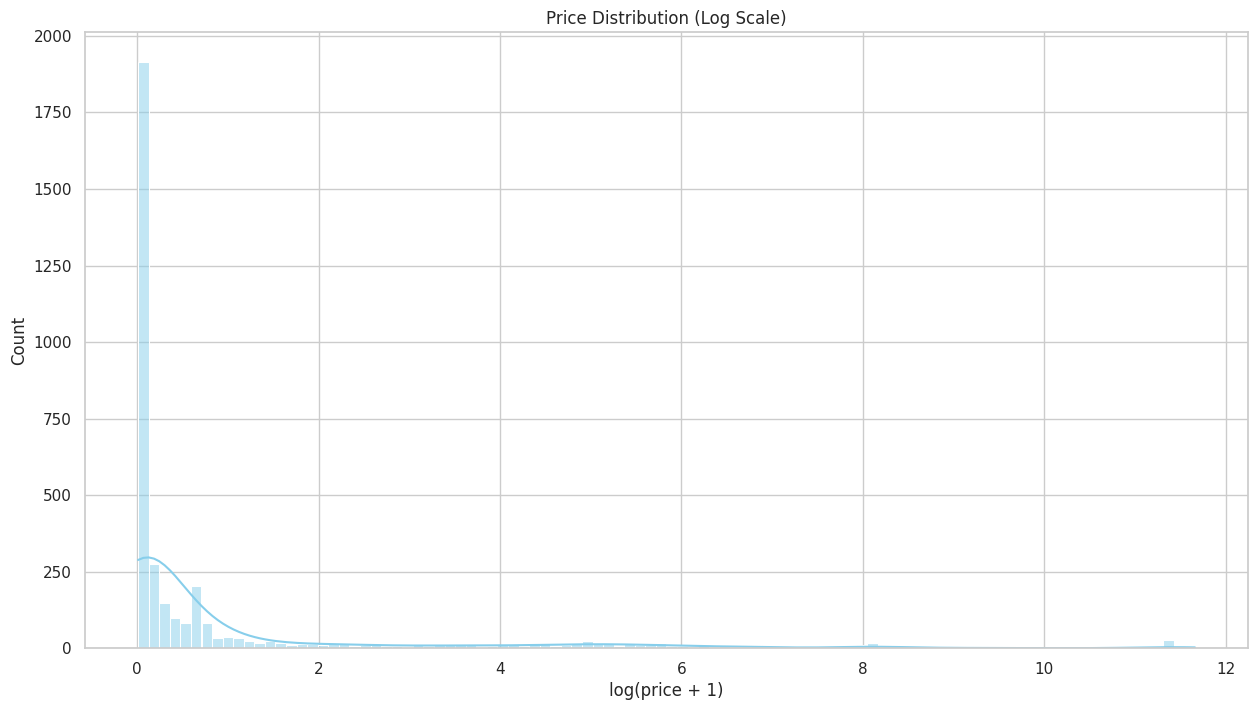

In [ ]:
# 1. Price distribution (log)
plt.figure(figsize=(15,8))
sns.histplot(df_filtered['price_log'], bins=100, color='skyblue', kde=True)
plt.title("Price Distribution (Log Scale)")
plt.xlabel("log(price + 1)")
plt.ylabel("Count")
plt.show()

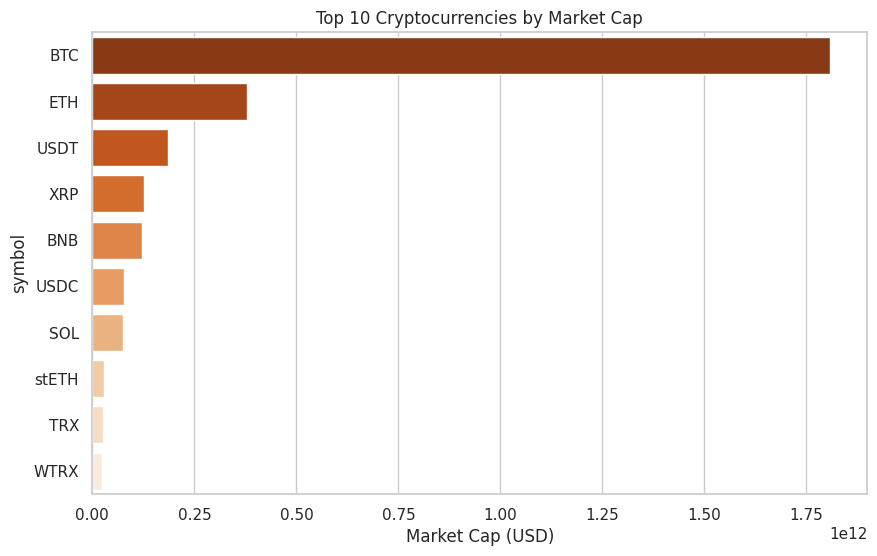

In [ ]:
# 2. Top 10 cryptocurrencies by market cap

top10 = df_filtered.sort_values('market_cap', ascending=False).head(10)
sns.barplot(x='market_cap', y='symbol', data=top10, hue='symbol', palette='Oranges_r', dodge=False, legend=False)
plt.xlabel("Market Cap (USD)")
plt.title("Top 10 Cryptocurrencies by Market Cap")
plt.show()

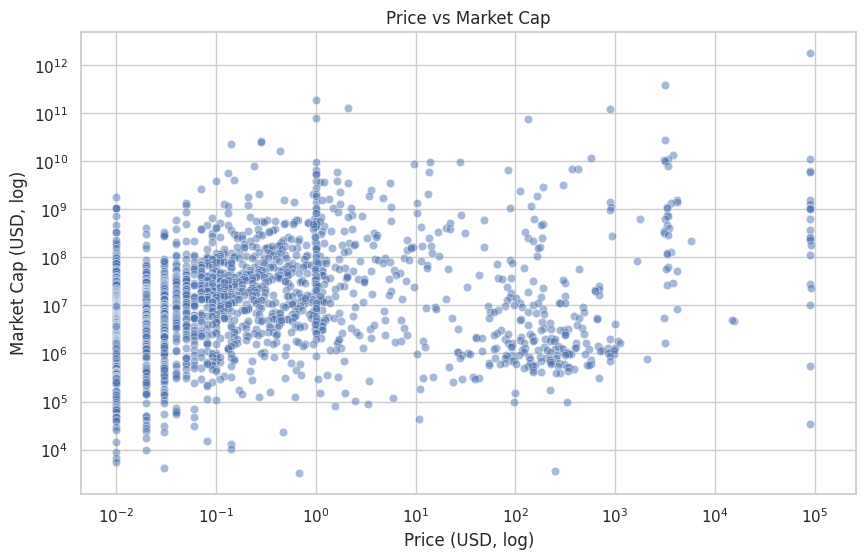

In [ ]:
# 3. Price vs Market Cap

sns.scatterplot(data=df_filtered, x='price_usd', y='market_cap', alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Price (USD, log)")
plt.ylabel("Market Cap (USD, log)")
plt.title("Price vs Market Cap")
plt.show()

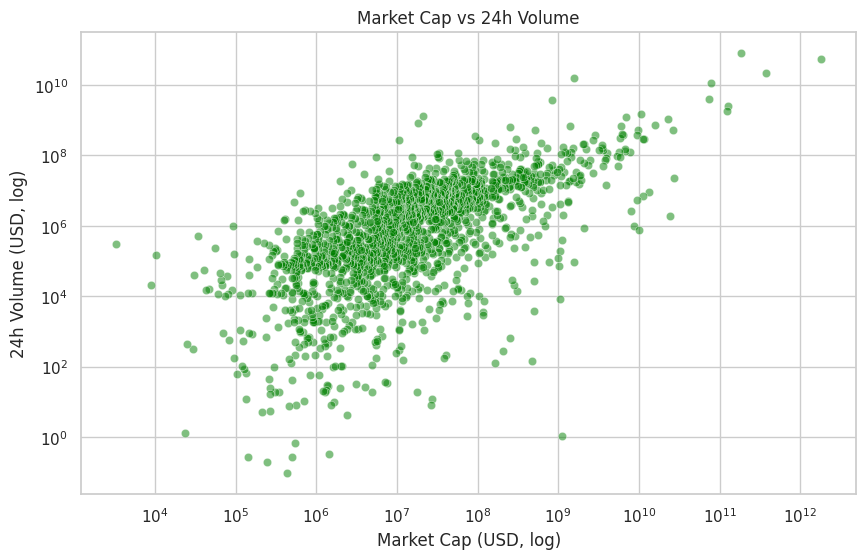

In [ ]:
# 4. Market Cap vs Volume

sns.scatterplot(data=df_filtered, x='market_cap', y='volume_24h', alpha=0.5, color='green')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Market Cap (USD, log)")
plt.ylabel("24h Volume (USD, log)")
plt.title("Market Cap vs 24h Volume")
plt.show()

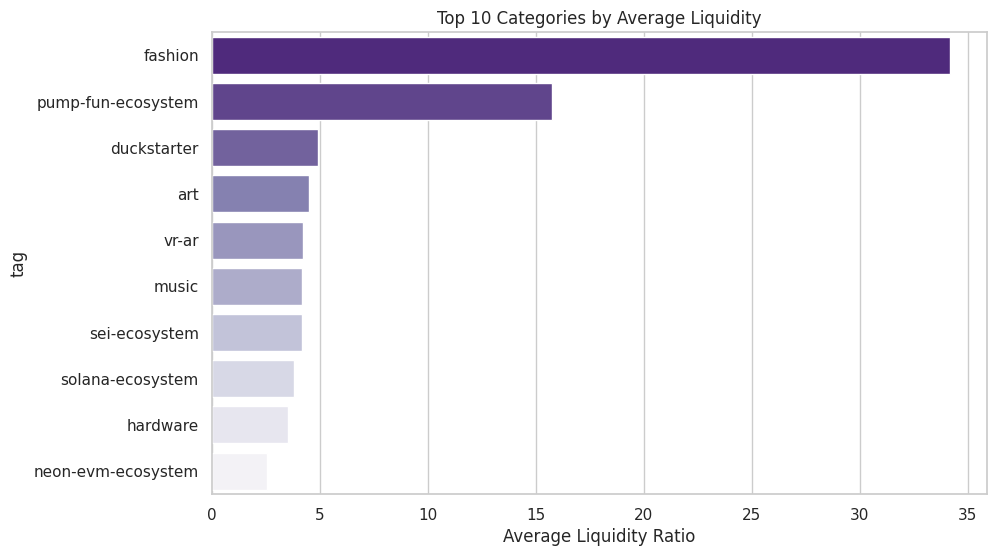

In [ ]:
# 5. Top 10 categories by average liquidity

top_cat_liquidity = tags_exploded_filtered.groupby('tag')['liquidity_ratio'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_cat_liquidity.values, y=top_cat_liquidity.index,
            hue=top_cat_liquidity.index, palette='Purples_r', dodge=False, legend=False)

plt.xlabel("Average Liquidity Ratio")
plt.title("Top 10 Categories by Average Liquidity")
plt.show()

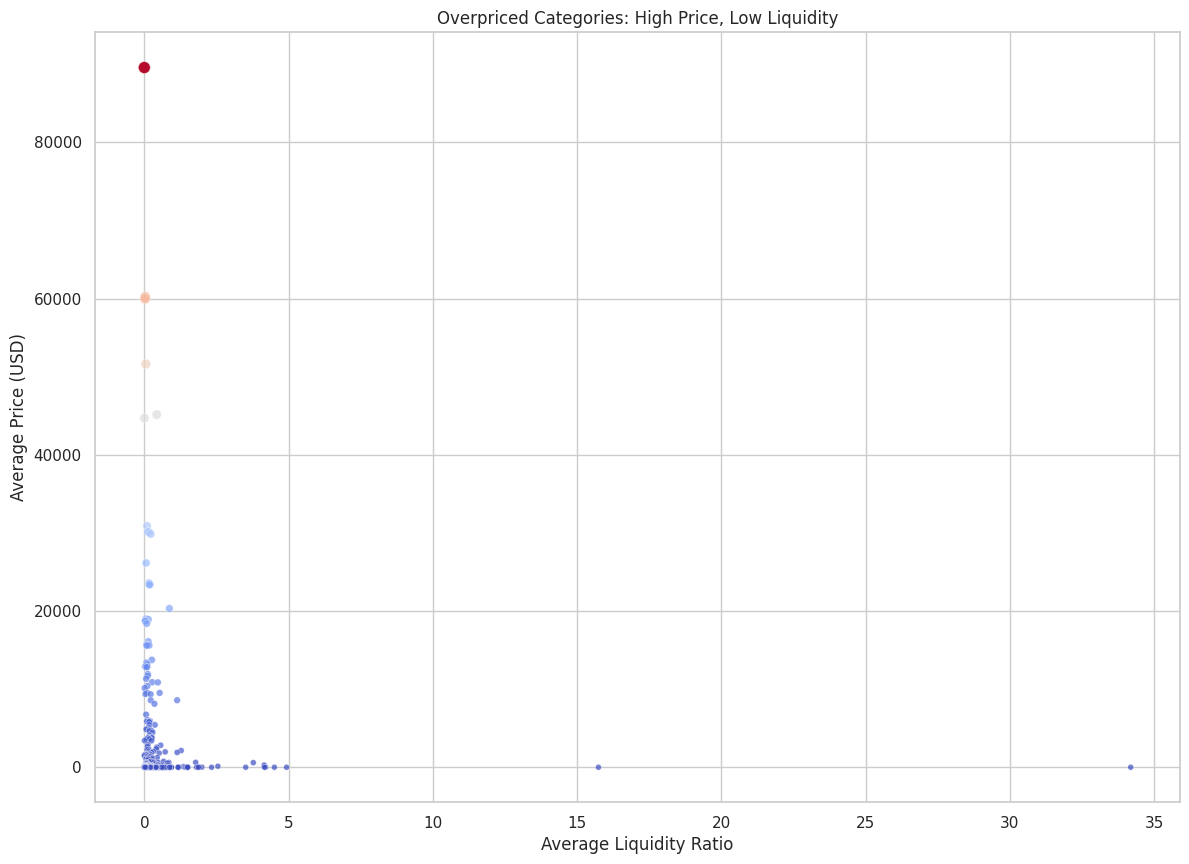

In [ ]:
# 6. Overpriced categories scatter plot (Price vs Liquidity)

plt.figure(figsize=(14,10))
sns.scatterplot(data=category_stats_filtered, x='avg_liquidity', y='avg_price', size='avg_price',
                hue='avg_price', palette='coolwarm', legend=False, alpha=0.7)
plt.xlabel("Average Liquidity Ratio")
plt.ylabel("Average Price (USD)")
plt.title("Overpriced Categories: High Price, Low Liquidity")
plt.show()

In [ ]:
# 7. Optional interactive scatter plot with Plotly

fig = px.scatter(df_filtered, x='price_usd', y='market_cap', color='liquidity_ratio',
                 size='market_cap', hover_data=['name','symbol'],
                 log_x=True, log_y=True, title="Price vs Market Cap ")
fig.show()



In [ ]:
display(
    category_stats_filtered
    .head(10)
    .style
    .format({
        'avg_price': '${:,.2f}',
        'avg_liquidity': '{:.2f}'
    })
)


,avg_price,avg_liquidity
tag,,
rsk-smart-bitcoin,"$89,607.74",0.00
rootstock-rsk-ecosystem,"$89,564.28",0.00
zeta-ecosystem,"$89,564.28",0.00
starknet-ecosystem,"$60,223.11",0.03
b²-network-ecosystem,"$59,978.16",0.03
corn-ecosystem,"$51,619.49",0.05
merlin-ecosystem,"$45,150.20",0.43
bouncebit-ecosystem,"$44,701.53",0.01
taiko-ecosystem,"$30,894.60",0.10
